# Uber case study

In [1]:
# loading python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/sharm/Desktop/PY/Case_Study-2 (Uber case study)/Uber Request Data.csv")

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
df.shape  # here we get an outlook of data 

(6745, 6)

In [5]:
#Now we will check weather request id is unique. there are possibilities that our data may contain duplicate values
len(df["Request id"].unique())

# here we see that our length of unique values is 6745 which is equal to rows.so there is no duplicate value in requestid

6745

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [7]:
df["Request timestamp"].value_counts()  # here we see that out date format is not same for all the rows so we need to change all our data into dattime format

11/7/2016 9:40         6
11/7/2016 19:02        6
11/7/2016 8:37         6
11/7/2016 17:57        6
11/7/2016 22:00        5
                      ..
11/7/2016 5:21         1
14-07-2016 05:39:02    1
14-07-2016 05:46:06    1
14-07-2016 08:01:16    1
13-07-2016 18:19:52    1
Name: Request timestamp, Length: 5618, dtype: int64

Here we convert our different different date time format same for all rows.
but one thing you may have notice that our format is in yyyy-mm-dd so we want to change it into yyyy-dd-mm

In [8]:
df["Drop timestamp"].value_counts()

11/7/2016 13:00        4
12/7/2016 21:53        4
12/7/2016 6:22         4
12/7/2016 21:04        4
11/7/2016 7:50         3
                      ..
15-07-2016 00:47:44    1
15-07-2016 07:12:45    1
11/7/2016 9:35         1
14-07-2016 04:42:17    1
14-07-2016 06:38:45    1
Name: Drop timestamp, Length: 2598, dtype: int64

In [9]:
df["Request timestamp"]=df["Request timestamp"].astype(str)
df["Request timestamp"]=df["Request timestamp"].replace("/","-")

In [10]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"])

In [11]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"]) 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


Now we will fetch request day & request hours from request timestamp column to know that on which day request is raised & on what time.

In [13]:
# fetching day

request_day = df["Request timestamp"].dt.day
df["Request_day"]=request_day

In [14]:
# fetching hours

request_hour = df["Request timestamp"].dt.hour
df["request_hour"] = request_hour

In [15]:
df.head()   # in our date frame we have request day & request hours

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,request_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8


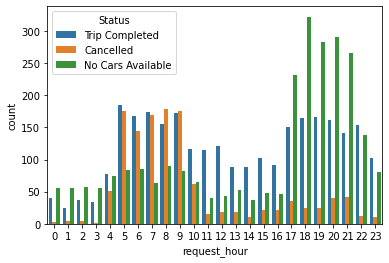

In [16]:
_=sns.countplot(x="request_hour",data=df,hue="Status")  # countplot of hours wise status

C:\Users\sharm\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


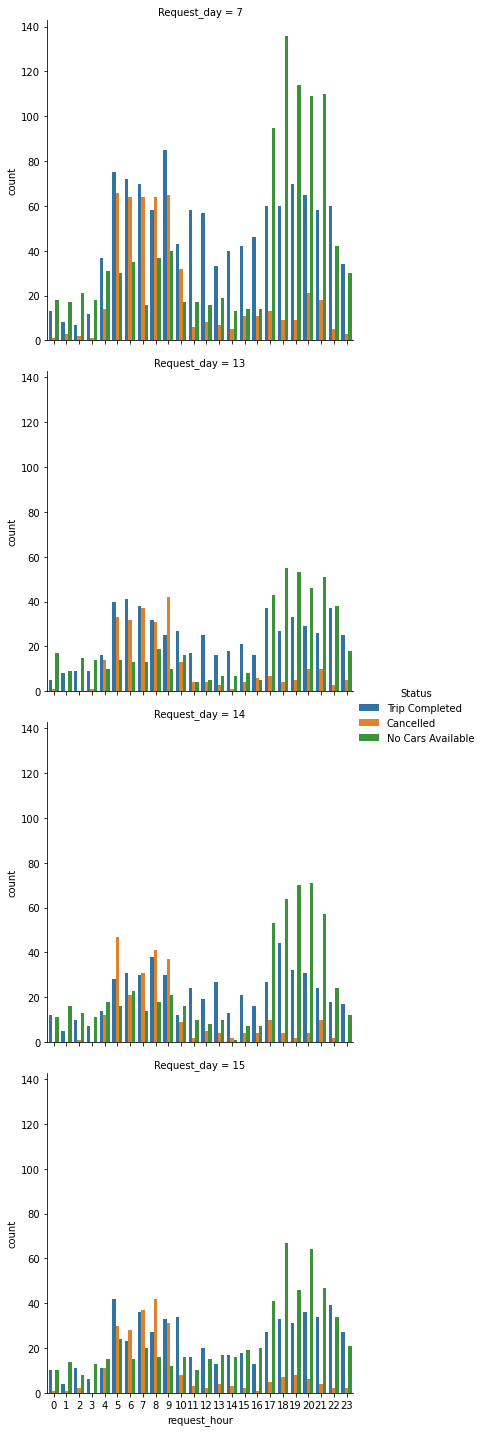

In [17]:
_=sns.factorplot(x="request_hour",row="Request_day",data=df,kind="count",hue="Status")

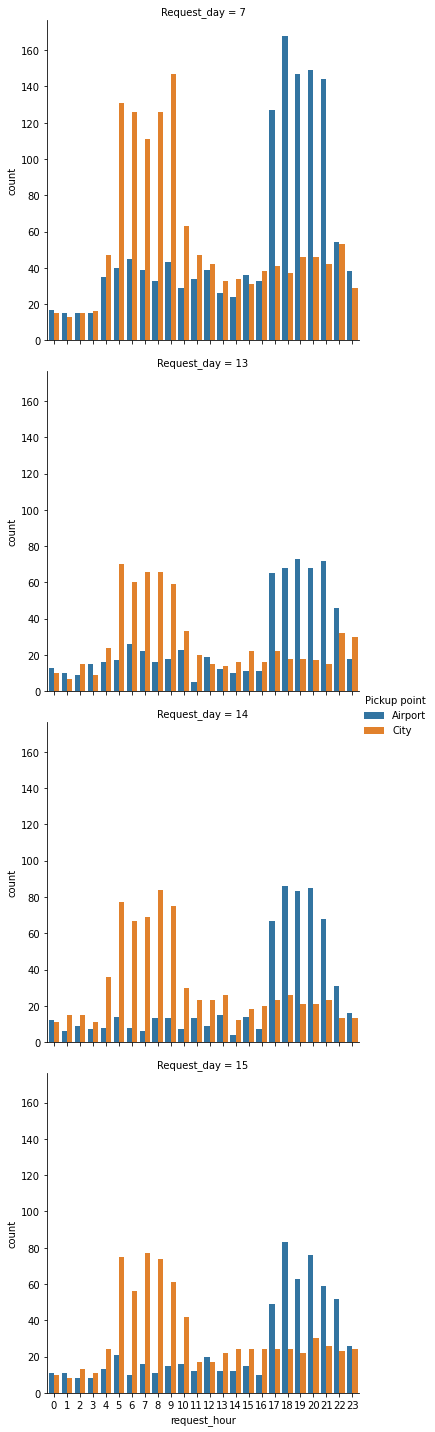

In [18]:
_=sns.factorplot(x="request_hour",row="Request_day",data=df,kind="count",hue="Pickup point")

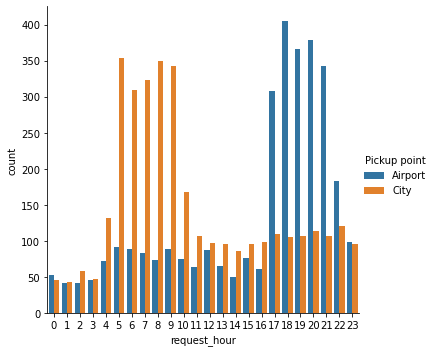

In [19]:
_=sns.factorplot(x="request_hour",data=df,kind="count",hue="Pickup point")

In [20]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,request_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,13,21
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,14,6
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,15,5
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,15,17
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,7,6


condition 
Our Request hours are : <br>
request hours <5 - "Pre Morning"<br>
request hours 5<=x<10 - "Morning Rush"<br>
request hours 10<=x<17 - "Day Time"<br>
request hours 17<=x<22 - "Evening Rush"<br>
beyond this - "late Night"

In [21]:
df.iloc[0,7]

11

In [22]:
df["Time_slots"]=0

In [23]:
j=0
for i in range(0,6745):
    if df.iloc[j,7]<5:
        df.iloc[j,8]="Pre Morning"
    elif df.iloc[j,7]>=5 and df.iloc[j,7]<10:
        df.iloc[j,8]="Morning Rush"
    elif df.iloc[j,7]>=10 and df.iloc[j,7]<17:
        df.iloc[j,8]="Day Time"
    elif df.iloc[j,7]>=17 and df.iloc[j,7]<22:
        df.iloc[j,8]="Evening Rush"
    else:
        df.iloc[j,8]="Late night"
    j=j+1

In [24]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,request_hour,Time_slots
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11,Day Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,17,Evening Rush
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,9,Morning Rush
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,21,Evening Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8,Morning Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,15,23,Late night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,15,23,Late night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,15,23,Late night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,15,23,Late night


In [25]:
df["Time_slots"].value_counts()  # here we can judge that htere rquired more cabs because there is huge rush in evening time that is 5-10 PM

Evening Rush    2342
Morning Rush    2103
Day Time        1224
Pre Morning      578
Late night       498
Name: Time_slots, dtype: int64

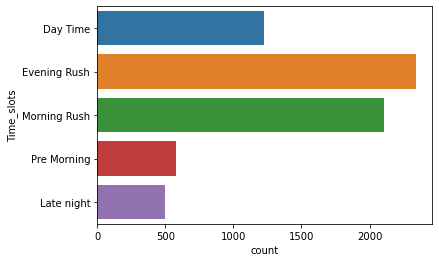

In [26]:
_=sns.countplot(y="Time_slots",data=df)  # Gra[phically we conclude Max rush is in evening time & the lowest rush in late night

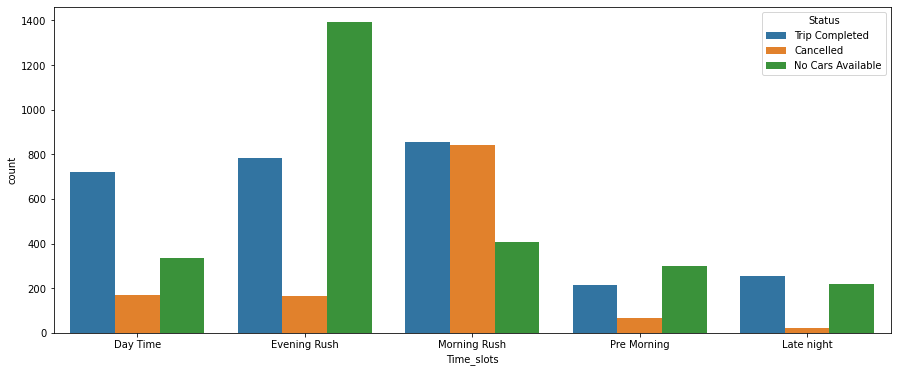

In [27]:
plt.figure(figsize=(15,6))
_=sns.countplot(x="Time_slots",data=df,hue="Status") # Time slot wise rush
plt.show()

In [28]:
df_morning_rush = df[df["Time_slots"]=="Morning Rush"]
df_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,request_hour,Time_slots
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,9,Morning Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8,Morning Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,14,6,Morning Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,15,5,Morning Rush
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,7,6,Morning Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,15,9,Morning Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,15,9,Morning Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,15,9,Morning Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,15,9,Morning Rush


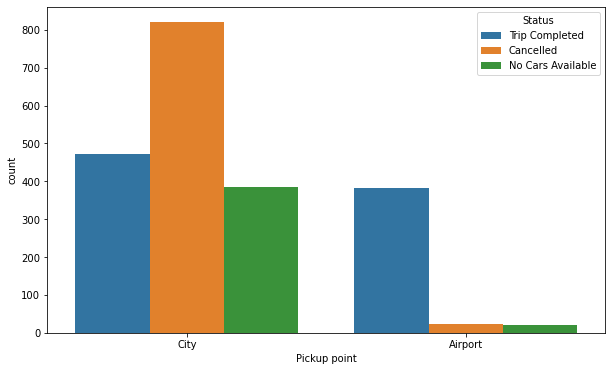

In [29]:
plt.figure(figsize=(10,6))
_=sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush) # in city on morning rush there are largest cab cancellation

In [36]:
df_airport_cancelled = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]
print(df_airport_cancelled.head())
print(df_airport_cancelled.shape)    # there are 23 rides which are cancelled who have pick up point at airport in morning time.

      Request id Pickup point  Driver id     Status   Request timestamp  \
2841        1867      Airport        3.0  Cancelled 2016-12-07 09:59:00   
2909        1462      Airport       23.0  Cancelled 2016-12-07 05:01:00   
2910         196      Airport       24.0  Cancelled 2016-11-07 06:07:00   
2944        5847      Airport       31.0  Cancelled 2016-07-15 09:05:38   
3130        2844      Airport       74.0  Cancelled 2016-07-13 05:28:12   

     Drop timestamp  Request_day  request_hour    Time_slots  
2841            NaT            7             9  Morning Rush  
2909            NaT            7             5  Morning Rush  
2910            NaT            7             6  Morning Rush  
2944            NaT           15             9  Morning Rush  
3130            NaT           13             5  Morning Rush  
(23, 9)


In [39]:
df_City_cancelled = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]
print(df_City_cancelled.head())
print(df_City_cancelled.shape)  # from this analysis we can see that there are very large number (820) cancellation on morning rush who have pick point at city.

      Request id Pickup point  Driver id     Status   Request timestamp  \
2831        2905         City        1.0  Cancelled 2016-07-13 06:08:41   
2837        4451         City        2.0  Cancelled 2016-07-14 08:38:38   
2842        4383         City        3.0  Cancelled 2016-07-14 07:48:31   
2846        4280         City        4.0  Cancelled 2016-07-14 06:33:09   
2847        4533         City        4.0  Cancelled 2016-07-14 09:31:08   

     Drop timestamp  Request_day  request_hour    Time_slots  
2831            NaT           13             6  Morning Rush  
2837            NaT           14             8  Morning Rush  
2842            NaT           14             7  Morning Rush  
2846            NaT           14             6  Morning Rush  
2847            NaT           14             9  Morning Rush  
(820, 9)


In [40]:
df_evening_rush = df[df["Time_slots"]=="Evening Rush"]

In [41]:
df_evening_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,request_hour,Time_slots
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,17,Evening Rush
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,21,Evening Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,13,21,Evening Rush
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,15,17,Evening Rush
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,13,17,Evening Rush
...,...,...,...,...,...,...,...,...,...
6685,6625,Airport,NaN,No Cars Available,2016-07-15 21:52:53,NaT,15,21,Evening Rush
6686,6629,Airport,NaN,No Cars Available,2016-07-15 21:53:37,NaT,15,21,Evening Rush
6687,6628,Airport,NaN,No Cars Available,2016-07-15 21:54:21,NaT,15,21,Evening Rush
6688,6624,Airport,NaN,No Cars Available,2016-07-15 21:56:00,NaT,15,21,Evening Rush


In [35]:
df_city_cancelled = df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]
df_city_cancelled.head()  # there are very few numbers that in city  cabs cancellation

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,request_hour,Time_slots
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,14,17,Evening Rush
2864,3549,City,9.0,Cancelled,2016-07-13 18:03:30,NaT,13,18,Evening Rush
2871,3499,City,13.0,Cancelled,2016-07-13 17:46:24,NaT,13,17,Evening Rush
2881,3810,City,16.0,Cancelled,2016-07-13 21:06:22,NaT,13,21,Evening Rush
2892,4968,City,19.0,Cancelled,2016-07-14 18:40:44,NaT,14,18,Evening Rush


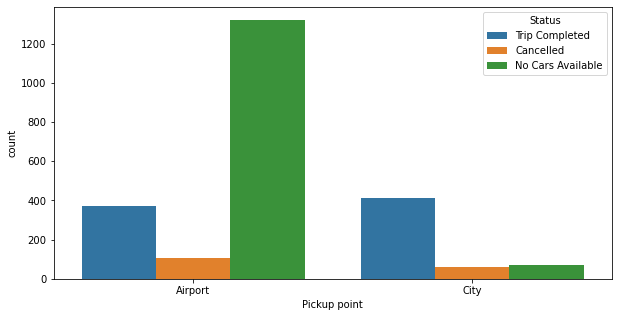

In [43]:
plt.figure(figsize=(10,5))
_=sns.countplot(x="Pickup point",data=df_evening_rush,hue="Status")

In [47]:
df_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

In [49]:
df_morning_rush.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,request_hour,Time_slots
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,9,Morning Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8,Morning Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,14,6,Morning Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,15,5,Morning Rush
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,7,6,Morning Rush


In [50]:
df_evening_rush.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,request_hour,Time_slots
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,17,Evening Rush
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,21,Evening Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,13,21,Evening Rush
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,15,17,Evening Rush
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,13,17,Evening Rush


Morning Rush Analysis

In [64]:
print("Total request who have pick point city at Morning Rush :",df_morning_rush[df_morning_rush["Pickup point"]=="City"].shape[0])
print("Trip Completed :",df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0])
print("Trip Cancelled :",df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")].shape[0])
print("Cars not available :",df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="No Cars Available")].shape[0])

Total request who have pick point city at Morning Rush : 1677
Trip Completed : 472
Trip Cancelled : 820
Cars not available : 385


Evening Rush Analysis

In [65]:
print("Total request who have pick point city at Evening Rush :",df_evening_rush[df_evening_rush["Pickup point"]=="City"].shape[0])
print("Trip Completed :",df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0])
print("Trip Cancelled :",df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0])
print("Cars not available :",df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="No Cars Available")].shape[0])

Total request who have pick point city at Evening Rush : 542
Trip Completed : 411
Trip Cancelled : 60
Cars not available : 71


In [72]:
df_evening_city = df.loc[(df["Pickup point"]=="City") & (df["Time_slots"]=="Evening Rush")]
df_evening_city.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,request_hour,Time_slots
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,15,17,Evening Rush
25,5254,City,3.0,Trip Completed,2016-07-14 21:23:03,2016-07-14 22:25:19,14,21,Evening Rush


In [78]:
df_evening_city_counts = pd.DataFrame(df_evening_city["Status"].value_counts())
df_evening_city_counts

,Status
Trip Completed,411
No Cars Available,71
Cancelled,60


In [79]:
df_evening_city_counts["Status"].values

array([411,  71,  60], dtype=int64)

In [80]:
df_evening_city_counts["Status"].index

Index(['Trip Completed', 'No Cars Available', 'Cancelled'], dtype='object')

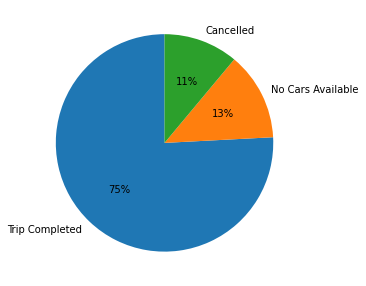

In [88]:
fig,ax = plt.subplots(figsize=(10,5))
_=ax.pie(df_evening_city_counts["Status"].values,labels=df_evening_city_counts["Status"].index,autopct="%i%%",startangle=90)

In [89]:
df_morning_city = df.loc[(df["Pickup point"]=="City") & (df["Time_slots"]=="Morning Rush")]
df_morning_city.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,request_hour,Time_slots
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,9,Morning Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,8,Morning Rush


In [90]:
df_morning_city_counts = pd.DataFrame(df_morning_city["Status"].value_counts())
df_morning_city_counts

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


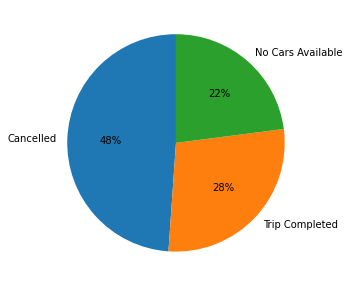

In [92]:
fig,ax = plt.subplots(figsize=(10,5))
_=ax.pie(df_morning_city_counts["Status"].values,labels=df_morning_city_counts["Status"].index,autopct="%i%%",startangle=90)

# Conclusion

 1. From analysis cab drivers could be given a bonus for each trip they complete from city to the airport in the morning rush. This will ensure less nunbers of trips are cancelled.
 2. Uber can pay for the gas mileage of drivers to come back to the city without a ride.
 3. Drivers can again be given bonus to complete a trip from the airport in the evening. This will ensure that the supply increases at the airport.
